In [1]:
# Download Brain Tumor MRI Dataset from Kaggle
import kagglehub

# Download the dataset
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')
print(f'Dataset downloaded to: {masoudnickparvar_brain_tumor_mri_dataset_path}')

c:\Users\PRIYANSH DIXIT\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 149M/149M [00:32<00:00, 4.73MB/s] 

Extracting files...


Data source import complete.
Dataset downloaded to: C:\Users\PRIYANSH DIXIT\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


# Brain tumor detection:

![](http://static.toiimg.com/photo/msid-92121094/92121094.jpg?968296)


### A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems.

### Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

## Brain tumors are categorized as primary or secondary:
![](http://conquer-magazine.com/media/widgetkit/MaySlideshow02-fc71623ee2bbf3b0b4a9baf68033ce34.png)
### 1) A primary brain tumor originates in your brain. Many primary brain tumors are benign.
### 2) A secondary brain tumor, also known as a metastatic brain tumor, occurs when cancer cells spreadTrusted Source to your brain from another organ, such as your lung or breast.


# <b>1 <span style='color:#4285f4'>|</span> Importing libraries</b>
- **For ML Models**: Tensorflow, keras
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn

In [4]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random

# <b>2 <span style='color:#4285f4'>|</span> Reading the Dataset</b>

In [5]:
# Use the downloaded dataset path
train_dir = masoudnickparvar_brain_tumor_mri_dataset_path + '/Training'
test_dir = masoudnickparvar_brain_tumor_mri_dataset_path + '/Testing'

train_paths = []
train_labels = []

for label in os.listdir(train_dir):
    for image in os.listdir(train_dir+"//" +label):
        train_paths.append(train_dir + '//'+label+ '//'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

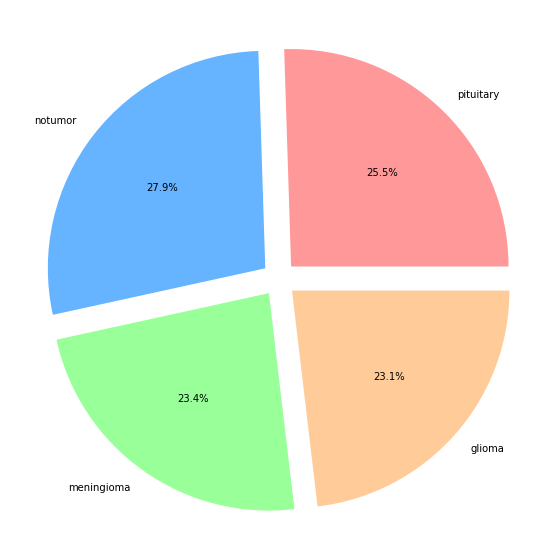

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


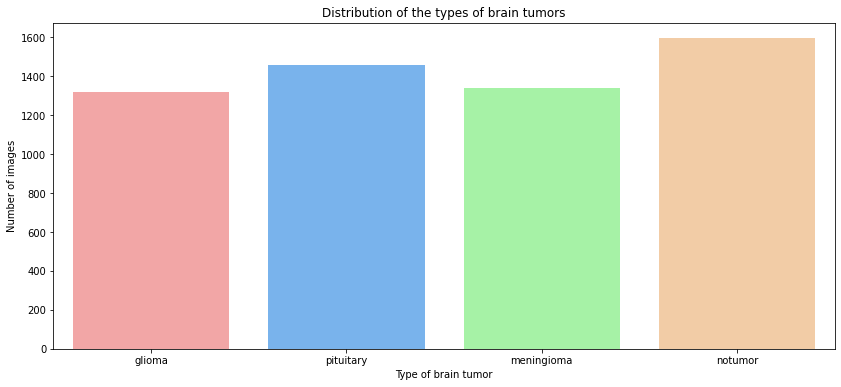

In [ ]:
plt.figure(figsize=(10,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie([len(os.listdir(train_dir+"//" +label))
        for label in os.listdir(train_dir)],
         labels=os.listdir(train_dir),
          colors = colors,
           explode = (0.08,0.08,0.08,0.08)
           ,autopct='%1.1f%%')
plt.show()




plt.figure(figsize=(14,6))
sns.countplot(train_labels, palette=colors)
plt.title('Distribution of the types of brain tumors')
plt.xlabel('Type of brain tumor')
plt.ylabel('Number of images');





#### The dataset is considered balanced

## But what are those labels?

- Not tumor: indicates that those images do not contain a tumor.
- meningioma: is a type of tumor that develops from the membranes that surround the brain and spinal cord.
- glioma: is a type of tumor that develops from glial cells, which are cells that support and protect neurons.
- pituitary tumor: is a type of tumor that develops from the pituitary gland, which is located at the base of the brain.

In [ ]:
test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(test_dir+ '//' + label):
        test_paths.append(test_dir +'//'+label + '//'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

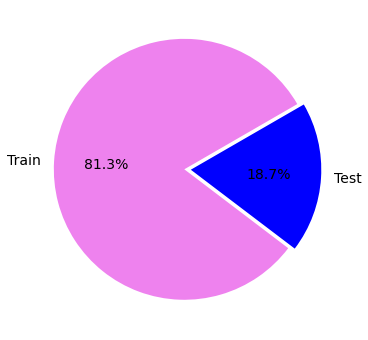

In [ ]:
plt.figure(figsize=(14,6))
colors = ['Violet' , 'Blue']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);


# <b>3 <span style='color:#4285f4'>|</span> Data Augmentation</b>
- Random Brightness: 80% - 120%  
- Random Contrast: 80% - 120%
- Random sharpness: 80% - 120%

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Sharpness(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

<h3 style="font-family:Sans;"> Example for the data:</h3>

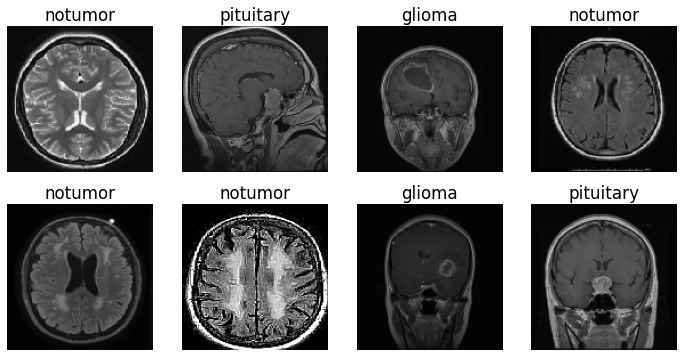

In [ ]:
IMAGE_SIZE = 128


def open_images(paths):

    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)


images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()


# <b>4 <span style='color:#4285f4'>|</span> Data Generator</b>
<p style="font-size:15px; font-family:Sans; line-height: 1.7em">
    Given a list of paths to images, and the labels, <br>
    this function augments the images, normalizes them, encodes the label, and then returns the batch on which the model can train on. <br>
</p>

In [ ]:
unique_labels = os.listdir(train_dir)

def encode_label(labels):
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x))
    return np.array(encoded)

def decode_label(labels):
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1):
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

# <b>5 <span style='color:#4285f4'>|</span>CUSTOM CNN Model</b>

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                4

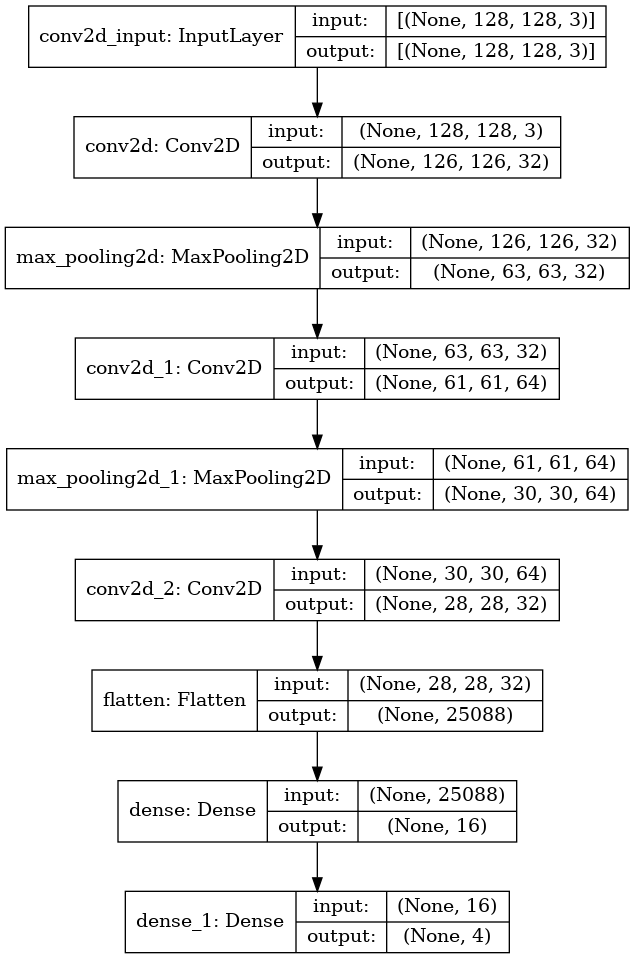

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

# <b>5.1 <span style='color:#4285f4'>|</span> Train CNN Model</b>

In [ ]:

model.fit(datagen(train_paths, train_labels, batch_size=32, epochs=10), steps_per_epoch=len(train_paths)//32, epochs=10)


Epoch 1/10
178/178 [==============================] - 73s 340ms/step - loss: 0.7152 - accuracy: 0.7135
Epoch 2/10
178/178 [==============================] - 28s 158ms/step - loss: 0.4314 - accuracy: 0.8389
Epoch 3/10
178/178 [==============================] - 28s 156ms/step - loss: 0.2922 - accuracy: 0.8919
Epoch 4/10
178/178 [==============================] - 27s 153ms/step - loss: 0.2044 - accuracy: 0.9301
Epoch 5/10
178/178 [==============================] - 27s 154ms/step - loss: 0.1490 - accuracy: 0.9486
Epoch 6/10
178/178 [==============================] - 29s 160ms/step - loss: 0.1223 - accuracy: 0.9600
Epoch 7/10
178/178 [==============================] - 29s 161ms/step - loss: 0.0871 - accuracy: 0.9676
Epoch 8/10
178/178 [==============================] - 28s 159ms/step - loss: 0.0628 - accuracy: 0.9782
Epoch 9/10
178/178 [==============================] - 28s 160ms/step - loss: 0.0470 - accuracy: 0.9836
Epoch 10/10
178/178 [==============================] - 28s 155ms/step - l

# <b>5.2 <span style='color:#4285f4'>|</span> Evaluate the model </b>

In [ ]:
train_loss, train_acc = model.evaluate(open_images(train_paths), encode_label(train_labels))
test_loss, test_acc = model.evaluate(open_images(test_paths), encode_label(test_labels))

print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)

41/41 [==============================] - 0s 10ms/step - loss: 0.2502 - accuracy: 0.9321
Train accuracy: 0.9821428656578064
Test accuracy: 0.9321128726005554


## Classification report


In [ ]:
predictions = model.predict(open_images(test_paths))
predictions = np.argmax(predictions, axis=1)
print(classification_report(encode_label(test_labels), predictions, target_names=unique_labels))


              precision    recall  f1-score   support

   pituitary       0.95      0.99      0.97       300
     notumor       0.99      0.99      0.99       405
  meningioma       0.93      0.79      0.85       306
      glioma       0.86      0.95      0.90       300

    accuracy                           0.94      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.94      0.94      0.93      1311



# <b>6 <span style='color:#4285f4'>| </span>VGG Model</b>

### using transfer learning:

In [ ]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 15,763,908
Trainable params: 8,128,644
Non-trainable params: 7,635,264
___________________________________

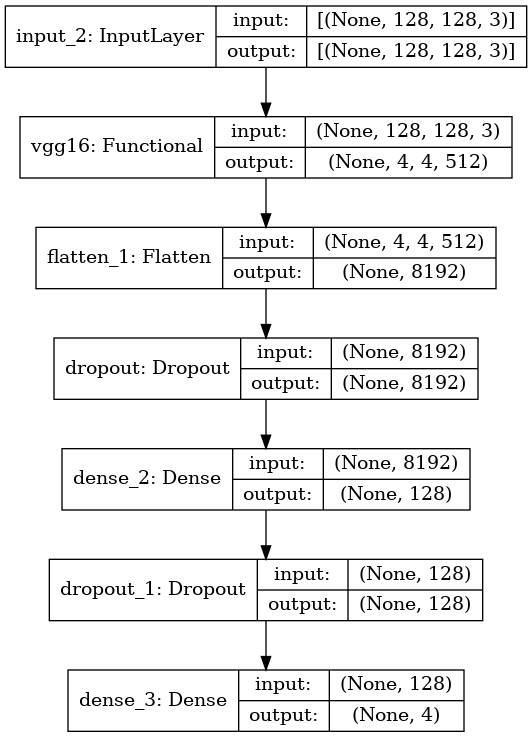

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

# <b>6.1 <span style='color:#4285f4'>|</span> Train VGG Model</b>

In [ ]:
batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 5
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 [==============================] - 32s 101ms/step - loss: 0.4646 - sparse_categorical_accuracy: 0.8253
Epoch 2/5
285/285 [==============================] - 31s 103ms/step - loss: 0.2236 - sparse_categorical_accuracy: 0.9164
Epoch 3/5
285/285 [==============================] - 30s 104ms/step - loss: 0.1665 - sparse_categorical_accuracy: 0.9382
Epoch 4/5
285/285 [==============================] - 29s 103ms/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9575
Epoch 5/5
285/285 [==============================] - 29s 103ms/step - loss: 0.0849 - sparse_categorical_accuracy: 0.9689


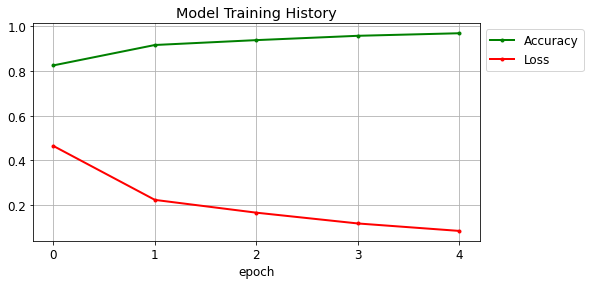

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# <b>6.2 <span style='color:#4285f4'>|</span> Evaluate Model with Test Samples</b>

In [ ]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

41it [00:15,  2.73it/s]                        


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.88      0.97      0.93       300
  meningioma       0.94      0.86      0.90       306
     notumor       0.99      0.99      0.99       405
   pituitary       0.98      0.97      0.97       300

    accuracy                           0.95      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.95      0.95      0.95      1311



# <b>7 <span style='color:#4285f4'>|</span> Train Inception Model</b>

In [ ]:
# build inception model
base_model = InceptionV3(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet')
# Set all layers to non-trainable
for layer in base_model.layers:
    layer.trainable = False
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True
base_model.layers[-5].trainable = True

model = Sequential()
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(unique_labels), activation='softmax'))

model.summary()


87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 2, 2, 2048)        21802784  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_______________________________________________________

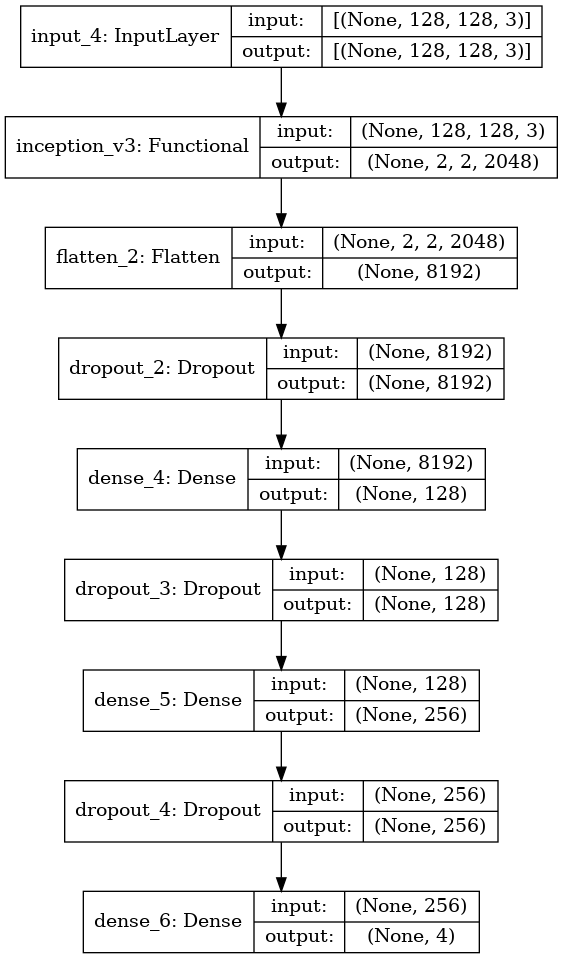

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['sparse_categorical_accuracy'])

batch_size = 20
steps = int(len(train_paths)/batch_size)
epochs = 8
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)



Epoch 1/8
285/285 [==============================] - 34s 103ms/step - loss: 0.8556 - sparse_categorical_accuracy: 0.6698
Epoch 2/8
285/285 [==============================] - 30s 102ms/step - loss: 0.5556 - sparse_categorical_accuracy: 0.7923
Epoch 3/8
285/285 [==============================] - 29s 103ms/step - loss: 0.4475 - sparse_categorical_accuracy: 0.8368
Epoch 4/8
285/285 [==============================] - 29s 102ms/step - loss: 0.4008 - sparse_categorical_accuracy: 0.8477
Epoch 5/8
285/285 [==============================] - 30s 104ms/step - loss: 0.3645 - sparse_categorical_accuracy: 0.8658
Epoch 6/8
285/285 [==============================] - 29s 102ms/step - loss: 0.3154 - sparse_categorical_accuracy: 0.8844
Epoch 7/8
285/285 [==============================] - 29s 101ms/step - loss: 0.3019 - sparse_categorical_accuracy: 0.8832
Epoch 8/8
285/285 [==============================] - 29s 101ms/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9028


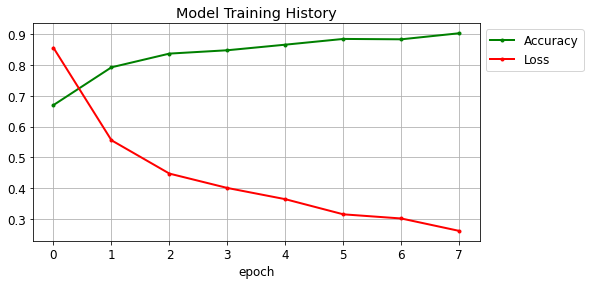

In [ ]:

plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# <b>7.1 <span style='color:#4285f4'>|</span> Evaluate Model with Test Samples</b>

In [ ]:
# Evaluate model with test data
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x,y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)



41it [00:12,  3.16it/s]                        


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

      glioma       0.92      0.84      0.88       300
  meningioma       0.81      0.82      0.81       306
     notumor       0.97      0.96      0.97       405
   pituitary       0.88      0.96      0.92       300

    accuracy                           0.90      1311
   macro avg       0.90      0.89      0.89      1311
weighted avg       0.90      0.90      0.90      1311



Generating predictions for ROC AUC plot...


41it [00:09,  4.39it/s]                        


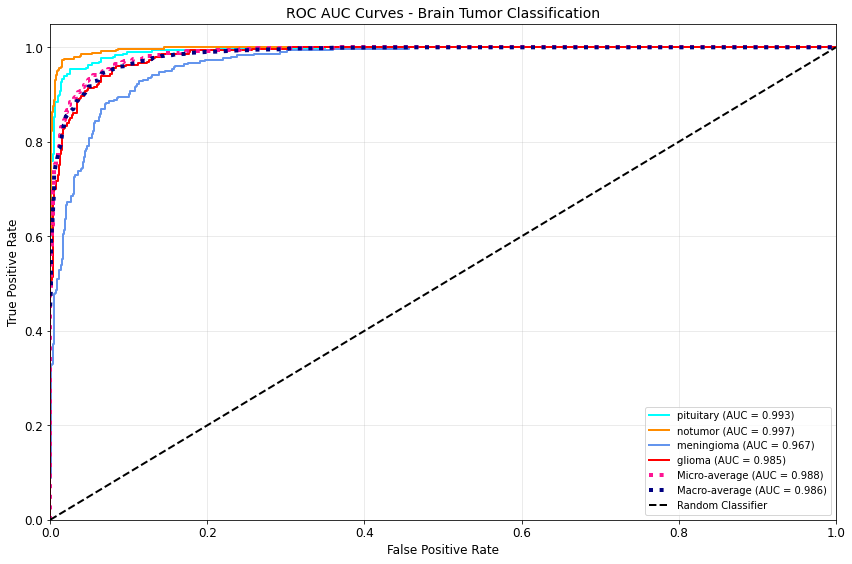


Individual AUC Scores:
pituitary: 0.993
notumor: 0.997
meningioma: 0.967
glioma: 0.985
Macro-average AUC: 0.986
Micro-average AUC: 0.988
Multi-class AUC (OvR): 0.986


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_roc_auc(y_true, y_pred_proba, class_names, title="ROC AUC Curves"):
    """
    Plot ROC AUC curves for multi-class classification

    Parameters:
    y_true: True labels (encoded)
    y_pred_proba: Predicted probabilities for each class
    class_names: List of class names
    title: Plot title
    """
    # Binarize the output
    n_classes = len(class_names)
    y_true_bin = label_binarize(y_true, classes=range(n_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_proba.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot ROC curves
    plt.figure(figsize=(12, 8))

    # Plot individual class curves
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label=f'{class_names[i]} (AUC = {roc_auc[i]:.3f})')

    # Plot micro and macro averages
    plt.plot(fpr["micro"], tpr["micro"],
             label=f'Micro-average (AUC = {roc_auc["micro"]:.3f})',
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label=f'Macro-average (AUC = {roc_auc["macro"]:.3f})',
             color='navy', linestyle=':', linewidth=4)

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return roc_auc

# Generate ROC AUC plot for your current model
# First, get predictions with probabilities instead of just class predictions
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred_proba = []
y_true_encoded = []

print("Generating predictions for ROC AUC plot...")
for x, y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1), total=steps):
    pred_proba = model.predict(x, verbose=0)  # Get probabilities
    y_pred_proba.extend(pred_proba)
    y_true_encoded.extend(y)

# Convert to numpy arrays
y_pred_proba = np.array(y_pred_proba)
y_true_encoded = np.array(y_true_encoded)

# Plot ROC AUC curves
roc_scores = plot_roc_auc(y_true_encoded, y_pred_proba, unique_labels,
                         title="ROC AUC Curves - Brain Tumor Classification")

# Print individual AUC scores
print("\nIndividual AUC Scores:")
for i, class_name in enumerate(unique_labels):
    print(f"{class_name}: {roc_scores[i]:.3f}")
print(f"Macro-average AUC: {roc_scores['macro']:.3f}")
print(f"Micro-average AUC: {roc_scores['micro']:.3f}")

# Calculate overall multi-class AUC score
try:
    multi_class_auc = roc_auc_score(y_true_encoded, y_pred_proba, multi_class='ovr', average='macro')
    print(f"Multi-class AUC (OvR): {multi_class_auc:.3f}")
except:
    print("Could not calculate multi-class AUC score")